<a href="https://colab.research.google.com/github/afloresg69/Visualitzaci-de-dades/blob/main/Pr%C3%A0ctica_2_VD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Les dades de l'NHS a UK es llegeixen a aquest codi des de https://www.cancerdata.nhs.uk/getdataout
# 
# Aquí faig un filtrat de les dades, degut a la complexitat del contingut. Amb l'ajuda d'Excel i els documents d'ajuda de la web, 
# puc analitzar i afinar les dades a escollir
# Tenim junts totals i detalls per:
#  *  Tipus de càncer i total
#  *  Anys i trams d'anys
#  *  Edats, amb diferents trams per cada tipus de càncer i totals
#  *  Gènere (sex al fitxer), no sempre desglossat
#  *  diferents marcadors  .a  --> encara no hi han dades  o .j  --> no s'han recollit, etc
#
# Les dades d'Espanya s'han tret de epdata.es  (Europa Press)
# No hi ha enllaç per llegir-les amb aquest codi. S'ha de baixar al pc. El seu format és molt senzill perquè només conté una taula amb les dades
# bàsiques per crear la visualització. A més contenen texte que cal esborrar. Aixó ho he fet directament amb l'Excel en el moment de la lectura i 
# anàlisi de les dades


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
##To read directly from Drive in Google Colab use:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# lectura dels fitxers de la web cancerdata.nhs.uk
# els fitxers llegits són tractament, incidència i supervivència

df_tra = pd.read_csv("https://www.cancerdata.nhs.uk/getdataout/GDO_0023/GDO_0023_treat_13-18_w.csv") 
df_inc = pd.read_csv("https://www.cancerdata.nhs.uk/getdataout/GDO_0025/GDO_0025_inc_13-19_w.csv") 
df_sup = pd.read_csv("https://www.cancerdata.nhs.uk/getdataout/GDO_0027/GDO_0027_surv_13-18_w.csv") 

In [5]:
# observació del dataframe 'tractament'
df_tra.head()


,Cancer Site,Year,Tumour Type,Tumour Type 2,Tumour Type 3,Basis of Diagnosis,Stage,Stage Detail,Stage Detail 2,Age,...,Surgery and RT percentage LCI,Surgery and RT percentage UCI,Surgery and CT and RT count,Surgery and CT and RT percentage,Surgery and CT and RT percentage LCI,Surgery and CT and RT percentage UCI,Other care count,Other care percentage,Other care percentage LCI,Other care percentage UCI
0,"Bladder, Urethra, Renal Pelvis and Ureter",2013,All,All,All,Not split by Basis of Diagnosis,All stages,All,All,All ages,...,.m,.m,.m,.m,.m,.m,.m,.m,.m,.m
1,"Bladder, Urethra, Renal Pelvis and Ureter",2013,Renal Pelvis and Ureter,All,All,Not split by Basis of Diagnosis,All stages,All,All,All ages,...,.m,.m,.m,.m,.m,.m,.m,.m,.m,.m
2,"Bladder, Urethra, Renal Pelvis and Ureter",2013,Renal Pelvis and Ureter,Malignant and in situ,All,Not split by Basis of Diagnosis,All stages,All,All,All ages,...,.m,.m,.m,.m,.m,.m,.m,.m,.m,.m
3,"Bladder, Urethra, Renal Pelvis and Ureter",2013,Renal Pelvis and Ureter,Malignant and in situ,All,Not split by Basis of Diagnosis,Non-muscle-invasive,All,All,All ages,...,.m,.m,.m,.m,.m,.m,.m,.m,.m,.m
4,"Bladder, Urethra, Renal Pelvis and Ureter",2013,Renal Pelvis and Ureter,Malignant and in situ,All,Not split by Basis of Diagnosis,Non-muscle-invasive,Ta/Tis,All,All ages,...,.m,.m,.m,.m,.m,.m,.m,.m,.m,.m


In [6]:
# Filtrat de dades per agafar les dades segons els criteris necessaris:
#  Cancer Site = Pancreas
df_tra = df_tra[df_tra['Cancer Site'] == 'Pancreas']
#  Year = 2013, 2014, 2015, 2016, 2017, 2018 
anys=['2013', '2014', '2015', '2016', '2017', '2018']
df_tra = df_tra[df_tra.Year.isin(anys)]
#  Tipus de tumor = Carcinoma and Other  i Neuroendocrine. Rename de la columna per simplificar
df_tra.rename(columns={'Tumour Type': 'Tumour_Type', 
                           'Sex': 'Gender','Other care count':'Other'}, inplace=True)
#  Selecció de les files amb tipus tumor =carcinoma o neuroendocri
tipus_tumor=['Carcinoma and Other', 'Neuroendocrine']
df_tra = df_tra[df_tra.Tumour_Type.isin(tipus_tumor)]
#  Selecció de les files acumulades per gènere, tot i que no hi ha desglossament per totes les categories
df_tra = df_tra[df_tra['Gender'] == 'Persons']
df_tra.head()

,Cancer Site,Year,Tumour_Type,Tumour Type 2,Tumour Type 3,Basis of Diagnosis,Stage,Stage Detail,Stage Detail 2,Age,...,Surgery and RT percentage LCI,Surgery and RT percentage UCI,Surgery and CT and RT count,Surgery and CT and RT percentage,Surgery and CT and RT percentage LCI,Surgery and CT and RT percentage UCI,Other,Other care percentage,Other care percentage LCI,Other care percentage UCI
3787,Pancreas,2013,Carcinoma and Other,All,All,Not split by Basis of Diagnosis,All stages,Not split by Stage Detail,Not split by Stage Detail 2,All ages,...,0.052,0.201,22,0.28,0.185,0.424,5266,67.066,66.018,68.097
3788,Pancreas,2013,Carcinoma and Other,All,All,Not split by Basis of Diagnosis,Stage 1-2,Not split by Stage Detail,Not split by Stage Detail 2,All ages,...,0.13,1.113,13,1.65,0.967,2.802,331,42.005,38.606,45.482
3789,Pancreas,2013,Carcinoma and Other,All,All,Not split by Basis of Diagnosis,Stage 1-2,Not split by Stage Detail,Not split by Stage Detail 2,Age 00-59,...,0.158,4.885,5,4.464,1.922,10.027,14,12.5,7.594,19.893
3790,Pancreas,2013,Carcinoma and Other,All,All,Not split by Basis of Diagnosis,Stage 1-2,Not split by Stage Detail,Not split by Stage Detail 2,Age 60-69,...,0.087,2.737,6,2.956,1.362,6.297,35,17.241,12.666,23.033
3793,Pancreas,2013,Carcinoma and Other,All,All,Not split by Basis of Diagnosis,Stage 1-2,Not split by Stage Detail,Not split by Stage Detail 2,Age 70-79,...,0.068,2.162,1,0.388,0.068,2.162,100,38.76,33.021,44.828


In [7]:
# Composició del fitxer de sortida

df_tra = df_tra[['Cancer Site', 'Year', 'Tumour_Type','Stage','Age','Gender','CT count','RT count','Surgery count','Other']].copy()

In [8]:
df_tra.head()

,Cancer Site,Year,Tumour_Type,Stage,Age,Gender,CT count,RT count,Surgery count,Other
3787,Pancreas,2013,Carcinoma and Other,All stages,All ages,Persons,2253,427,624,5266
3788,Pancreas,2013,Carcinoma and Other,Stage 1-2,All ages,Persons,368,61,294,331
3789,Pancreas,2013,Carcinoma and Other,Stage 1-2,Age 00-59,Persons,78,21,63,14
3790,Pancreas,2013,Carcinoma and Other,Stage 1-2,Age 60-69,Persons,142,23,114,35
3793,Pancreas,2013,Carcinoma and Other,Stage 1-2,Age 70-79,Persons,123,14,100,100


In [9]:
# esborrat de les fileres totalitzadores de tots els estadis i totes les edats
df_tra = df_tra.drop(df_tra[df_tra['Stage']== 'All stages'].index)
df_tra = df_tra.drop(df_tra[df_tra['Age']== 'All ages'].index)


In [26]:
df_tra.describe()

,Cancer Site,Year,Tumour_Type,Stage,Age,Gender,CT count,RT count,Surgery count,Other
count,168,168,168,168,168,168,168,168,168,168
unique,1,6,1,4,7,1,120,49,53,144
top,Pancreas,2013,Carcinoma and Other,Stage 4,Age 60-69,Persons,100,4,1,189
freq,168,28,168,102,48,168,4,10,20,3


In [39]:
# conversió a variables numèriques contínues
df_tra['CT count'] = df_tra['CT count'].astype(int)
df_tra['RT count'] = df_tra['RT count'].astype(int)
df_tra['Surgery count'] = df_tra['Surgery count'].astype(int)
df_tra['Other'] = df_tra['Other'].astype(int)


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


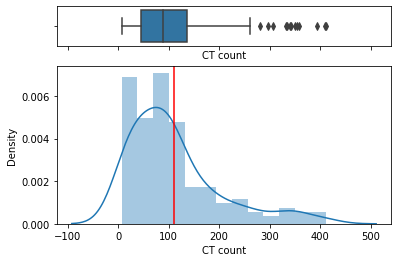

In [34]:
# Diagrames de caixes i histogrames de les variables numèriques contínues

import seaborn as sns

f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(df_tra['CT count'], ax=ax[0])
sns.distplot(df_tra['CT count'], ax=ax[1])
ax[1].axvline(np.mean(df_tra['CT count']), color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


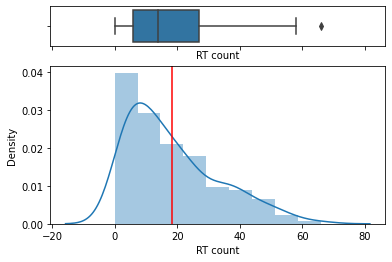

In [35]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(df_tra['RT count'], ax=ax[0])
sns.distplot(df_tra['RT count'], ax=ax[1])
ax[1].axvline(np.mean(df_tra['RT count']), color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


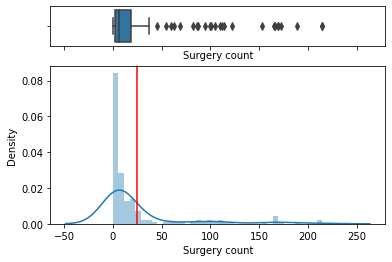

In [36]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(df_tra['Surgery count'], ax=ax[0])
sns.distplot(df_tra['Surgery count'], ax=ax[1])
ax[1].axvline(np.mean(df_tra['Surgery count']), color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


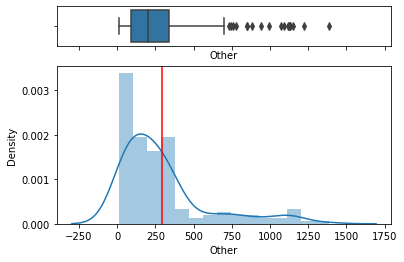

In [37]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(df_tra['Other'], ax=ax[0])
sns.distplot(df_tra['Other'], ax=ax[1])
ax[1].axvline(np.mean(df_tra['Other']), color='red')

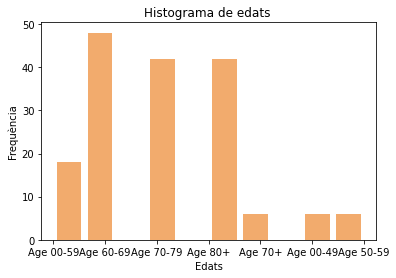

In [46]:
plt.hist(x=df_tra['Age'], color='#F2AB6D', rwidth=0.8)
plt.title('Histograma de edats ')
plt.xlabel('Edats')
plt.ylabel('Frequència')

plt.show() #dibujamos el histograma


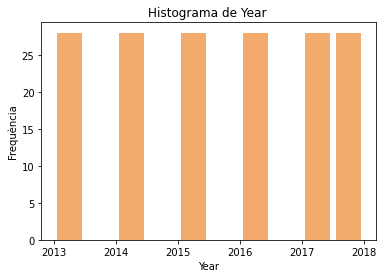

In [47]:
plt.hist(x=df_tra['Year'], color='#F2AB6D', rwidth=0.8)
plt.title('Histograma de Year ')
plt.xlabel('Year')
plt.ylabel('Frequència')

plt.show() #dibujamos el histograma

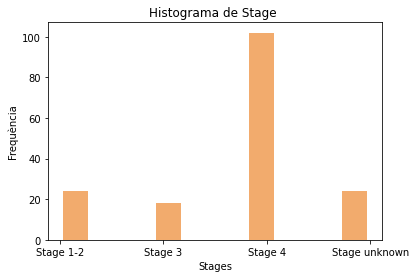

In [48]:
plt.hist(x=df_tra['Stage'], color='#F2AB6D', rwidth=0.8)
plt.title('Histograma de Stage ')
plt.xlabel('Stages')
plt.ylabel('Frequència')

plt.show() #dibujamos el histograma

In [10]:
# creació del fitxer Excel pel seu tractament amb l'eina de visualització
df_tra.to_excel('UK_tra.xlsx', sheet_name='UK_tra')

In [11]:
# Filtrat de dades per agafar les dades segons els criteris necessaris:

#  Year = 2013, 2014, 2015, 2016, 2017, 2018 , 2019
anys=['2013', '2014', '2015', '2016', '2017', '2018','2019']
df_inc_tot = df_inc[df_inc.Year.isin(anys)]
# agafo les linies totalitzadores de tipus tumor, dins de cada cancer site
df_inc_tot = df_inc_tot[df_inc_tot['Tumour Type'] == 'All']
# agafo les linies totalitzadores de tots els estadis
df_inc_tot = df_inc_tot[df_inc_tot['Stage'] == 'All stages']
# agafo les linies totalitzadores de totes les edats
df_inc_tot = df_inc_tot[df_inc_tot['Age'] == 'All ages']
# esborro la linia totalitzadora de tots els tipus de càncer
df_inc_tot = df_inc_tot.drop(df_inc_tot[df_inc_tot['Cancer Site']== 'All'].index)
df_inc_tot.head()

,Cancer Site,Year,Tumour Type,Tumour Type 2,Tumour Type 3,Tumour Type 4,Tumour Type 5,Tumour Type 6,Tumour Type 7,Basis of Diagnosis,...,Age Detail,Region,Gender,Grade,Nodal Status,Incidence,Population,Incidence Rate,Incidence Rate LCI,Incidence Rate UCI
0,"Bladder, Urethra, Renal Pelvis and Ureter",2013,All,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,All ages,All England,Persons,All grades,Not split by nodal status,20783,53865817,38.583,38.06,39.111
33,"Bladder, Urethra, Renal Pelvis and Ureter",2014,All,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,All ages,All England,Persons,All grades,Not split by nodal status,21147,54316618,38.933,38.41,39.461
66,"Bladder, Urethra, Renal Pelvis and Ureter",2015,All,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,All ages,All England,Persons,All grades,Not split by nodal status,21113,54786327,38.537,38.019,39.06
99,"Bladder, Urethra, Renal Pelvis and Ureter",2016,All,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,All ages,All England,Persons,All grades,Not split by nodal status,21146,55268067,38.261,37.747,38.78
132,"Bladder, Urethra, Renal Pelvis and Ureter",2017,All,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,All ages,All England,Persons,All grades,Not split by nodal status,20804,55619430,37.404,36.898,37.916


In [12]:
# Composició del fitxer de sortida amb la incidència total
df_inc_tot = df_inc_tot[['Cancer Site', 'Year', 'Incidence','Population','Incidence Rate']].copy()
# creació del fitxer Excel pel seu tractament amb l'eina de visualització
df_inc_tot.to_excel('UK_inc_tot.xlsx', sheet_name='UK_inc_tot')

In [13]:
df_inc_tot.head()

,Cancer Site,Year,Incidence,Population,Incidence Rate
0,"Bladder, Urethra, Renal Pelvis and Ureter",2013,20783,53865817,38.583
33,"Bladder, Urethra, Renal Pelvis and Ureter",2014,21147,54316618,38.933
66,"Bladder, Urethra, Renal Pelvis and Ureter",2015,21113,54786327,38.537
99,"Bladder, Urethra, Renal Pelvis and Ureter",2016,21146,55268067,38.261
132,"Bladder, Urethra, Renal Pelvis and Ureter",2017,20804,55619430,37.404


In [14]:
# Filtrat de dades per agafar les dades segons els criteris necessaris:
#  Cancer Site = Pancreas
df_inc_pan = df_inc[df_inc['Cancer Site'] == 'Pancreas']
#  Year = 2013, 2014, 2015, 2016, 2017, 2018 , 2019
anys=['2013', '2014', '2015', '2016', '2017', '2018','2019']
df_inc_pan = df_inc_pan[df_inc_pan.Year.isin(anys)]
# selecció de les fileres amb tipus tumor 'carcinoma' perquè es l'únic que te detall 
df_inc_pan = df_inc_pan[df_inc_pan['Tumour Type'] == 'Carcinoma and Other']
# selecció de les fileres amb estadio 4
df_inc_pan = df_inc_pan[df_inc_pan['Stage'] == 'Stage 4']
#selecció de les edats que corresponen al detall pàncreas - carcinoma - estadio 4
edats=['Age 00-49', 'Age 50-59', 'Age 60-69', 'Age 70-79', 'Age 80+']
df_inc_pan = df_inc_pan[df_inc_pan.Age.isin(edats)]
#selecció de les fileres totalitzades per tot UK
df_inc_pan = df_inc_pan[df_inc_pan['Region'] == 'All England']
df_inc_pan.head()

,Cancer Site,Year,Tumour Type,Tumour Type 2,Tumour Type 3,Tumour Type 4,Tumour Type 5,Tumour Type 6,Tumour Type 7,Basis of Diagnosis,...,Age Detail,Region,Gender,Grade,Nodal Status,Incidence,Population,Incidence Rate,Incidence Rate LCI,Incidence Rate UCI
4756,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,Age 00-49,All England,Persons,Not split by grade,Not split by nodal status,128,34889130,0.367,0.306,0.436
4757,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,Age 50-59,All England,Persons,Not split by grade,Not split by nodal status,356,6731737,5.288,4.753,5.867
4758,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,Age 60-69,All England,Persons,Not split by grade,Not split by nodal status,839,5857570,14.323,13.37,15.326
4769,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,Age 70-79,All England,Persons,Not split by grade,Not split by nodal status,1040,3849248,27.018,25.401,28.712
4780,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,Age 80+,All England,Persons,Not split by grade,Not split by nodal status,813,2538132,32.031,29.867,34.311


In [62]:
# Composició del fitxer de sortida amb la incidència del càncer de pàncreas estadio 4
df_inc_pan = df_inc_pan[['Cancer Site', 'Year', 'Tumour Type','Age','Incidence','Population','Incidence Rate']].copy()
df_inc_pan.head()

,Cancer Site,Year,Tumour Type,Age,Incidence,Population,Incidence Rate
4756,Pancreas,2013,Carcinoma and Other,Age 00-49,128,34889130,0.367
4757,Pancreas,2013,Carcinoma and Other,Age 50-59,356,6731737,5.288
4758,Pancreas,2013,Carcinoma and Other,Age 60-69,839,5857570,14.323
4769,Pancreas,2013,Carcinoma and Other,Age 70-79,1040,3849248,27.018
4780,Pancreas,2013,Carcinoma and Other,Age 80+,813,2538132,32.031


In [57]:
# conversió a variables numèriques contínues
df_inc_pan['Incidence'] = df_inc_pan['Incidence'].astype(int)
df_inc_pan['Population'] = df_inc_pan['Population'].astype(int)
df_inc_pan['Incidence Rate'] = df_inc_pan['Incidence Rate'].astype(float)



In [63]:
df_inc_pan.describe()

,Incidence,Population,Incidence Rate
count,35.000000,3.500000e+01,35.000000
mean,802.057143,1.103201e+07,19.200800
std,470.322351,1.232050e+07,15.765042
min,118.000000,2.538132e+06,0.335000
25%,435.500000,4.022609e+06,5.998000
50%,966.000000,5.889392e+06,16.465000
75%,1188.500000,7.437505e+06,33.144000
max,1512.000000,3.526477e+07,47.687000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


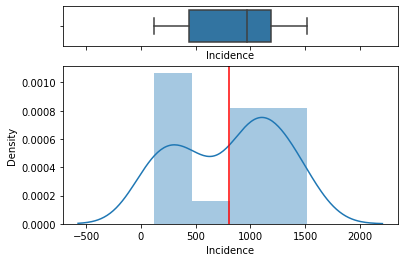

In [58]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(df_inc_pan['Incidence'], ax=ax[0])
sns.distplot(df_inc_pan['Incidence'], ax=ax[1])
ax[1].axvline(np.mean(df_inc_pan['Incidence']), color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


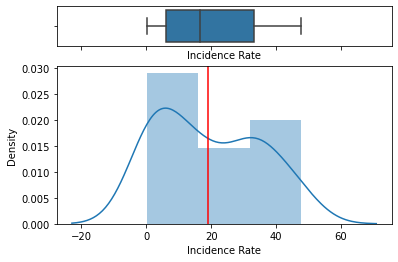

In [59]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(df_inc_pan['Incidence Rate'], ax=ax[0])
sns.distplot(df_inc_pan['Incidence Rate'], ax=ax[1])
ax[1].axvline(np.mean(df_inc_pan['Incidence Rate']), color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


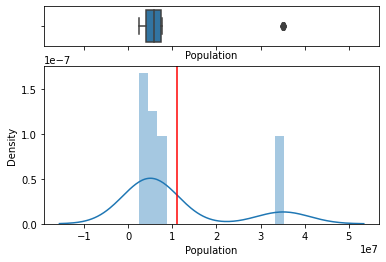

In [60]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})
sns.boxplot(df_inc_pan['Population'], ax=ax[0])
sns.distplot(df_inc_pan['Population'], ax=ax[1])
ax[1].axvline(np.mean(df_inc_pan['Population']), color='red')

In [15]:

# creació del fitxer Excel pel seu tractament amb l'eina de visualització
df_inc_pan.to_excel('UK_inc_pan.xlsx', sheet_name='UK_inc_pan')

In [16]:
# Filtrat de dades per agafar les dades segons els criteris necessaris:
#  Cancer Site = Pancreas
df_inc_pan_gen = df_inc[df_inc['Cancer Site'] == 'Pancreas']
#  Year = 2013, 2014, 2015, 2016, 2017, 2018 , 2019
anys=['2013', '2014', '2015', '2016', '2017', '2018','2019']
df_inc_pan_gen = df_inc_pan_gen[df_inc_pan_gen.Year.isin(anys)]
#selecció de les fileres totalitzades per tot UK
df_inc_pan_gen = df_inc_pan_gen[df_inc_pan_gen['Region'] == 'All England']
#  selecció de les fileres on hi ha detall per gènere
genere=['Male','Female']
df_inc_pan_gen = df_inc_pan_gen[df_inc_pan_gen.Gender.isin(genere)]
df_inc_pan_gen.head()

,Cancer Site,Year,Tumour Type,Tumour Type 2,Tumour Type 3,Tumour Type 4,Tumour Type 5,Tumour Type 6,Tumour Type 7,Basis of Diagnosis,...,Age Detail,Region,Gender,Grade,Nodal Status,Incidence,Population,Incidence Rate,Incidence Rate LCI,Incidence Rate UCI
4741,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,Age 60-69,All England,Female,Not split by grade,Not split by nodal status,89,2997886,2.969,2.384,3.653
4742,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,Age 60-69,All England,Male,Not split by grade,Not split by nodal status,115,2859684,4.021,3.32,4.827
4744,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,Age 70-79,All England,Female,Not split by grade,Not split by nodal status,132,2051396,6.435,5.384,7.631
4745,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,Age 70-79,All England,Male,Not split by grade,Not split by nodal status,126,1797852,7.008,5.838,8.344
4747,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,Age 80+,All England,Female,Not split by grade,Not split by nodal status,131,1569773,8.345,6.977,9.903


In [17]:
# Composició del fitxer de sortida amb la incidència del càncer de pàncreas
df_inc_pan_gen = df_inc_pan_gen[['Cancer Site', 'Year', 'Gender','Stage','Age','Incidence','Population','Incidence Rate']].copy()
df_inc_pan_gen.head()


In [ ]:
# creació del fitxer Excel pel seu tractament amb l'eina de visualització
df_inc_pan_gen.to_excel('UK_inc_pan_gen.xlsx', sheet_name='UK_inc_pan_gen')

In [18]:
# Filtrat de dades per agafar les dades segons els criteris necessaris:
# la supervivència als per terminis impossibles perquè no ham arribat tenen valor '.a'
# els substitueixo per ""
df_sup['Kaplan-Meier survival 24m']= df_sup['Kaplan-Meier survival 24m'].replace(['.a'],[''])
df_sup['Kaplan-Meier survival 36m']= df_sup['Kaplan-Meier survival 36m'].replace(['.a'],[''])
df_sup['Kaplan-Meier survival 48m']= df_sup['Kaplan-Meier survival 48m'].replace(['.a'],[''])
df_sup['Kaplan-Meier survival 60m']= df_sup['Kaplan-Meier survival 60m'].replace(['.a'],[''])
df_sup['Kaplan-Meier survival 72m']= df_sup['Kaplan-Meier survival 72m'].replace(['.a'],[''])

#  Year = 2013, 2014, 2015, 2016, 2017, 2018 
anys=['2013', '2014', '2015', '2016', '2017', '2018']
df_sup_tot = df_sup[df_sup.Year.isin(anys)]
#selecció de les fileres totalitzades per tipus de tumor
df_sup_tot = df_sup_tot[df_sup_tot['Tumour Type'] == 'All']
#selecció de les fileres totalitzades per estadios tots i els que no tenen detalls
estadis=['Not applicable','All stages']
df_sup_tot = df_sup_tot[df_sup_tot.Stage.isin(estadis)]
#selecció de les fileres totalitzades per totes les edats
df_sup_tot = df_sup_tot[df_sup_tot['Age'] == 'All ages']
# esborrat de les fileres de skin tumours perquè no tenen enregistrada supervivència
df_sup_tot = df_sup_tot.drop(df_sup_tot[df_sup_tot['Cancer Site']== 'Skin tumours'].index)
df_sup_tot.head()

,Cancer Site,Year,Tumour Type,Tumour Type 2,Tumour Type 3,Tumour Type 4,Tumour Type 5,Tumour Type 6,Tumour Type 7,Basis of Diagnosis,...,Net survival 60m UCI,Kaplan-Meier survival 60m,Kaplan-Meier survival 60m LCI,Kaplan-Meier survival 60m UCI,Net survival 72m,Net survival 72m LCI,Net survival 72m UCI,Kaplan-Meier survival 72m,Kaplan-Meier survival 72m LCI,Kaplan-Meier survival 72m UCI
0,"Bladder, Urethra, Renal Pelvis and Ureter",2013,All,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,73.2,58.5,57.8,59.2,70.9,69.8,72,54.7,53.9,55.4
33,"Bladder, Urethra, Renal Pelvis and Ureter",2014,All,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,73.3,58.2,57.5,58.9,.a,.a,.a,,.a,.a
66,"Bladder, Urethra, Renal Pelvis and Ureter",2015,All,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,.a,,.a,.a,.a,.a,.a,,.a,.a
99,"Bladder, Urethra, Renal Pelvis and Ureter",2016,All,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,.a,,.a,.a,.a,.a,.a,,.a,.a
132,"Bladder, Urethra, Renal Pelvis and Ureter",2017,All,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,.a,,.a,.a,.a,.a,.a,,.a,.a


In [19]:
# Composició del fitxer de sortida amb la supervicència dels càncers a UK
df_sup_tot = df_sup_tot[['Cancer Site', 'Year', 'Kaplan-Meier survival 03m','Kaplan-Meier survival 06m','Kaplan-Meier survival 09m',
                  'Kaplan-Meier survival 12m','Kaplan-Meier survival 24m','Kaplan-Meier survival 36m','Kaplan-Meier survival 48m','Kaplan-Meier survival 60m','Kaplan-Meier survival 72m']].copy()
df_sup_tot.head()


In [64]:
df_sup_tot.describe()

,Cancer Site,Year,Kaplan-Meier survival 03m,Kaplan-Meier survival 06m,Kaplan-Meier survival 09m,Kaplan-Meier survival 12m,Kaplan-Meier survival 24m,Kaplan-Meier survival 36m,Kaplan-Meier survival 48m,Kaplan-Meier survival 60m,Kaplan-Meier survival 72m
count,84,84,84,84,84,84,84,84,84,84,84
unique,14,6,68,67,68,73,65,48,42,29,15
top,"Bladder, Urethra, Renal Pelvis and Ureter",2013,93.1,88.1,84.5,93.5,,,,,
freq,6,14,4,3,4,4,14,28,42,56,70


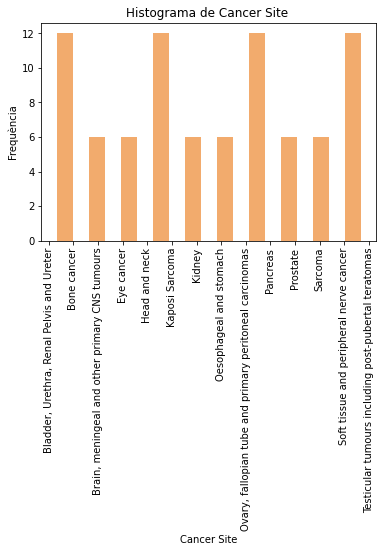

In [55]:
plt.hist(x=df_sup_tot['Cancer Site'], color='#F2AB6D', rwidth=0.5)
plt.title('Histograma de Cancer Site ')
plt.xlabel('Cancer Site')
plt.xticks(rotation=90)
plt.ylabel('Frequència')

plt.show() #dibujamos el histograma

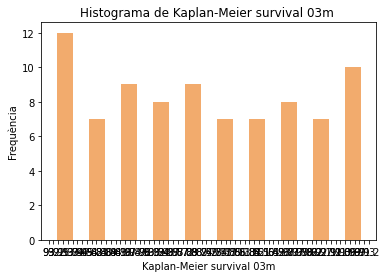

In [67]:
plt.hist(x=df_sup_tot['Kaplan-Meier survival 03m'], color='#F2AB6D', rwidth=0.5)
plt.title('Histograma de Kaplan-Meier survival 03m ')
plt.xlabel('Kaplan-Meier survival 03m')
#plt.xticks(rotation=90)
plt.ylabel('Frequència')

plt.show() #dibujamos el histograma

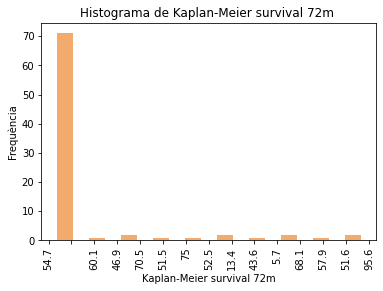

In [69]:
plt.hist(x=df_sup_tot['Kaplan-Meier survival 72m'], color='#F2AB6D', rwidth=0.5)
plt.title('Histograma de Kaplan-Meier survival 72m ')
plt.xlabel('Kaplan-Meier survival 72m')
plt.xticks(rotation=90)
plt.ylabel('Frequència')

plt.show() #dibujamos el histograma

In [ ]:
# creació del fitxer Excel pel seu tractament amb l'eina de visualització
df_sup_tot.to_excel('UK_sup_tot.xlsx', sheet_name='UK_sup_tot')

In [20]:
# Filtrat de dades per agafar les dades segons els criteris necessaris:
#  Cancer Site = Pancreas
df_sup_pan = df_sup[df_sup['Cancer Site'] == 'Pancreas']
#  Year = 2013, 2014, 2015, 2016, 2017, 2018 
anys=['2013', '2014', '2015', '2016', '2017', '2018']
df_sup_pan = df_sup_pan[df_sup_pan.Year.isin(anys)]
# selecció de les fileres totalitzades per gènere
df_sup_pan = df_sup_pan[df_sup_pan['Gender'] == 'Persons']
# selecció de les fileres totalitzades per regió
df_sup_pan = df_sup_pan[df_sup_pan['Region'] == 'All England']
# esborrat de les fileres totalitzadores d'estadis
df_sup_pan = df_sup_pan.drop(df_sup_pan[df_sup_pan['Stage']== 'All stages'].index)
# esborrat de les fileres totalitzadores d'edat
df_sup_pan = df_sup_pan.drop(df_sup_pan[df_sup_pan['Age']== 'All ages'].index)
df_sup_pan.head()

,Cancer Site,Year,Tumour Type,Tumour Type 2,Tumour Type 3,Tumour Type 4,Tumour Type 5,Tumour Type 6,Tumour Type 7,Basis of Diagnosis,...,Net survival 60m UCI,Kaplan-Meier survival 60m,Kaplan-Meier survival 60m LCI,Kaplan-Meier survival 60m UCI,Net survival 72m,Net survival 72m LCI,Net survival 72m UCI,Kaplan-Meier survival 72m,Kaplan-Meier survival 72m LCI,Kaplan-Meier survival 72m UCI
3939,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,.g,17.1,10.8,24.7,.f,.f,.f,16.2,10.1,23.6
3940,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,22.1,15.8,11.2,21.2,.f,.f,.f,15.3,10.8,20.7
3943,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,19.1,12.8,9.1,17.2,12.5,8.1,16.9,10.5,7.1,14.6
3946,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,.e,3.7,1.8,6.9,.e,.e,.e,2.3,.9,5.1
3950,Pancreas,2013,Carcinoma and Other,All,All,All,All,All,All,Not split by Basis of Diagnosis,...,.e,6.2,2,13.8,.e,.e,.e,6.2,2,13.8


In [21]:
# Composició del fitxer de sortida amb la supervicència dels càncers de pàncreas a UK

df_sup_pan = df_sup_pan[['Cancer Site', 'Year', 'Stage','Age','Kaplan-Meier survival 03m','Kaplan-Meier survival 06m','Kaplan-Meier survival 09m',
                  'Kaplan-Meier survival 12m','Kaplan-Meier survival 24m','Kaplan-Meier survival 36m','Kaplan-Meier survival 48m','Kaplan-Meier survival 60m','Kaplan-Meier survival 72m']].copy()
df_sup_pan.head()
# creació del fitxer Excel pel seu tractament amb l'eina de visualització
df_sup_pan.to_excel('UK_sup_pan.xlsx', sheet_name='UK_sup_pan')